In [3]:
import pandas as pd

Data Exploration

In [25]:
df=pd.read_csv("Employee.csv")
print("Unique values in each column:\n")
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"{col} ({df[col].nunique()} unique values): {unique_vals}\n")
data_length=len(df)

Unique values in each column:

Company (6 unique values): ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']

Age (29 unique values): [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]

Salary (40 unique values): [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]

Place (11 unique values): ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']

Country (1 unique values): ['India']

Gender (2 unique values): [0 1]



In [57]:
df.describe()
df.columns=[col.strip().lower().replace('_','') for col in df.columns]

Data Cleaning

In [121]:
df.isnull().sum()

company     8
age        23
salary      0
place      14
country     0
gender      0
dtype: int64

In [123]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['age'] = df['age'].replace(0, pd.NA)
df['salary'] = df['salary'].replace(0, pd.NA)
df = df.drop_duplicates()
df = df.dropna(subset=['company', 'place'])
Q1 = df['salary'].quantile(0.25)
Q3 = df['salary'].quantile(0.75)
IQR = Q3 - Q1
outliers=((df['salary'] < (Q1-1.5*IQR)) | (df['salary'] > (Q3+1.5*IQR)))
df=df[(df['salary'] >= (Q1-1.5*IQR)) & (df['salary'] <= (Q3+1.5*IQR))]
df = df.fillna(df.median(numeric_only=True))

print("Cleaned data\n",df)

Cleaned data
              company   age  salary     place country  gender
0                TCS  20.0  5000.0   Chennai   India       0
1            Infosys  30.0  5000.0    Mumbai   India       0
2                TCS  35.0  2300.0  Calcutta   India       0
3            Infosys  40.0  3000.0     Delhi   India       0
4                TCS  23.0  4000.0    Mumbai   India       0
..               ...   ...     ...       ...     ...     ...
142  Infosys Pvt Lmt  22.0  8202.0    Mumbai   India       0
143              TCS  33.0  9024.0  Calcutta   India       1
145          Infosys  44.0  4034.0     Delhi   India       1
146              TCS  33.0  5034.0    Mumbai   India       1
147          Infosys  22.0  8202.0    Cochin   India       0

[123 rows x 6 columns]


Data Analysis

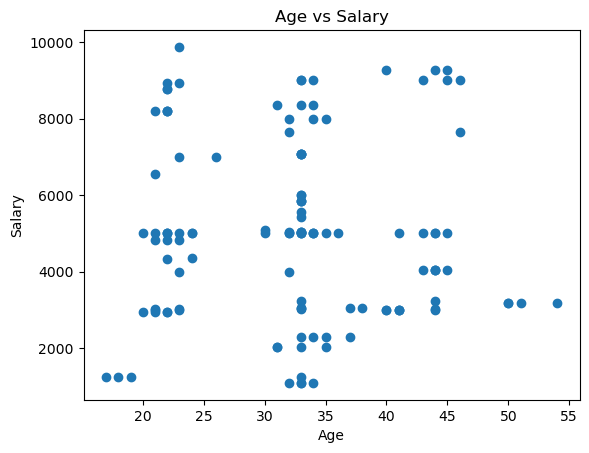

In [125]:
filtered_df = df[(df['age'] > 40) & (df['salary'] < 5000)]

import matplotlib.pyplot as plt
plt.scatter(df['age'], df['salary'])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs Salary')
plt.show()

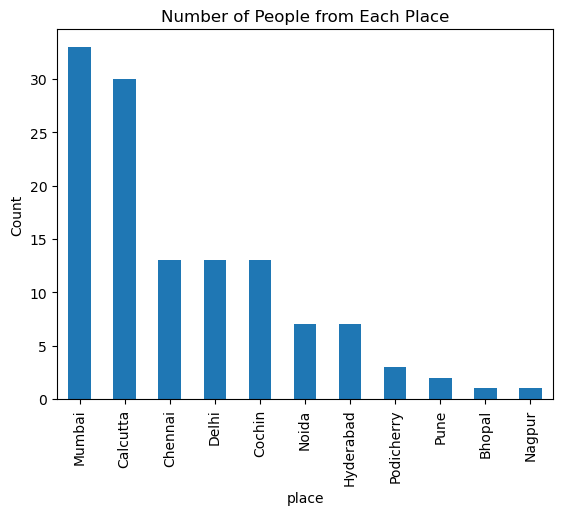

In [129]:
place_counts = df['place'].value_counts()
place_counts.plot(kind='bar')
plt.title('Number of People from Each Place')
plt.ylabel('Count')
plt.show()

Data Encoding

In [135]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,age,salary,gender,company_Congnizant,company_Infosys,company_Infosys Pvt Lmt,company_TCS,company_Tata Consultancy Services,place_Calcutta,place_Chennai,place_Cochin,place_Delhi,place_Hyderabad,place_Mumbai,place_Nagpur,place_Noida,place_Podicherry,place_Pune
0,20.0,5000.0,0,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False
1,30.0,5000.0,0,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False
2,35.0,2300.0,0,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
3,40.0,3000.0,0,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
4,23.0,4000.0,0,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False


Feature Scaling

In [145]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

scaled_standard = scaler_standard.fit_transform(df_encoded)
scaled_minmax = scaler_minmax.fit_transform(df_encoded)

df_standard_scaled = pd.DataFrame(scaled_standard, columns=df_encoded.columns)
df_minmax_scaled = pd.DataFrame(scaled_minmax, columns=df_encoded.columns)
print(df_standard_scaled.head())

        age    salary    gender  company_Congnizant  company_Infosys  \
0 -1.467635 -0.004180 -0.492366           -0.128565        -0.694210   
1 -0.287000 -0.004180 -0.492366           -0.128565         1.440486   
2  0.303318 -1.158958 -0.492366           -0.128565        -0.694210   
3  0.893635 -0.859571 -0.492366           -0.128565         1.440486   
4 -1.113445 -0.431875 -0.492366           -0.128565        -0.694210   

   company_Infosys Pvt Lmt  company_TCS  company_Tata Consultancy Services  \
0                -0.128565     1.293798                          -0.090536   
1                -0.128565    -0.772918                          -0.090536   
2                -0.128565     1.293798                          -0.090536   
3                -0.128565    -0.772918                          -0.090536   
4                -0.128565     1.293798                          -0.090536   

   place_Calcutta  place_Chennai  place_Cochin  place_Delhi  place_Hyderabad  \
0       -0.567962 